In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KMeans Clusterer

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist

In [30]:
filename = '../../data/processed/feature-eng.csv'
df = pd.read_csv(filename)

In [31]:
df = df.sort_values(['zipcode','start_year']).reset_index(drop=True)

In [32]:
df.head()

,year_5_EQI_MSA,year_5_EQI_zip,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_zip,year_5_RECPI_zip,year_2_EQI_MSA,year_5_EQI_state,year_3_EQI_zip,year_4_RECPI_zip,...,year_3_RECPI_zip,year_2_RECPI_zip,year_4_EQI_state,year_1_RECPI_zip,year_1_EQI_MSA,year_1_EQI_zip,year_5_RECPI_state,avg_eqi_year_5-10,zipcode,start_year
0,0.001361,0.001971,0.001394,0.001667,0.000827,0.057166,0.001266,0.002326,0.004772,0.024496,...,0.157489,0.022334,0.002023,0.048744,0.001549,0.002216,38.430626,0.001287,1001,1992
1,0.001299,0.001835,0.002317,0.001278,0.001156,0.053203,0.001164,0.003029,0.001614,0.038602,...,0.051642,0.027745,0.003745,0.035283,0.001233,0.000840,55.327602,0.001853,1001,1997
2,0.000917,0.003813,0.001222,0.000747,0.001882,0.183047,0.001073,0.001913,0.001128,0.040394,...,0.051883,0.079037,0.001782,0.054131,0.001494,0.001504,47.060886,0.000602,1001,2002
3,0.000808,0.000480,0.000725,0.000801,0.000640,0.024020,0.000758,0.001884,0.000631,0.035693,...,0.024611,0.037120,0.001838,0.036063,0.000702,0.000611,45.149307,0.000898,1001,2007
4,0.001361,0.001732,0.001394,0.001667,0.002858,0.072728,0.001266,0.002326,0.003037,0.185111,...,0.112374,0.111467,0.002023,0.020148,0.001549,0.000959,38.430626,0.002931,1002,1992


In [33]:
y = df[['avg_eqi_year_5-10']]
X = df.drop(['zipcode','start_year','avg_eqi_year_5-10'], axis=1)
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,year_5_EQI_MSA,year_5_EQI_zip,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_zip,year_5_RECPI_zip,year_2_EQI_MSA,year_5_EQI_state,year_3_EQI_zip,year_4_RECPI_zip,year_1_EQI_state,year_2_EQI_state,year_3_EQI_state,year_3_RECPI_zip,year_2_RECPI_zip,year_4_EQI_state,year_1_RECPI_zip,year_1_EQI_MSA,year_1_EQI_zip,year_5_RECPI_state
0,1.419335,1.156403,1.491923,1.807625,0.308747,0.215995,1.156580,3.404295,3.774334,-0.073654,3.101660,3.010210,2.828211,1.282764,-0.072511,2.606813,0.214847,1.185991,1.251538,0.102615
1,1.316383,1.050844,3.074423,1.191386,0.618625,0.180188,0.994389,4.766360,0.991997,0.045162,3.671295,4.069707,4.729936,0.216339,-0.011875,5.737127,0.069167,0.798592,0.235770,0.417774
2,0.680615,2.579561,1.196150,0.349907,1.302539,1.353463,0.850100,2.603874,0.563950,0.060263,3.802470,3.419742,2.536466,0.218766,0.562916,2.169356,0.273145,1.119195,0.725773,0.263585
3,0.498189,0.004722,0.343634,0.436597,0.132368,-0.083512,0.348184,2.547686,0.126282,0.020658,2.492929,3.149568,2.464278,-0.056009,0.093187,2.270770,0.077606,0.147200,0.066790,0.227930
4,1.419335,0.971300,1.491923,1.807625,2.222501,0.356615,1.156580,3.404295,2.245770,1.279253,3.101660,3.010210,2.828211,0.828222,0.926335,2.606813,-0.094622,1.185991,0.323919,0.102615


#### Whole Dataset

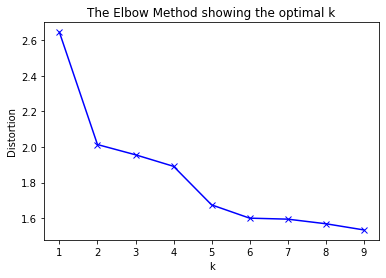

In [34]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
dataset_clusterer = KMeans(n_clusters=2).fit(X_scaled)

#### Zip

In [36]:
X_zip = X_scaled.filter(regex='zip$', axis=1)
X_zip.head()

,year_5_EQI_zip,year_2_EQI_zip,year_5_RECPI_zip,year_3_EQI_zip,year_4_RECPI_zip,year_3_RECPI_zip,year_2_RECPI_zip,year_1_RECPI_zip,year_1_EQI_zip
0,1.156403,0.308747,0.215995,3.774334,-0.073654,1.282764,-0.072511,0.214847,1.251538
1,1.050844,0.618625,0.180188,0.991997,0.045162,0.216339,-0.011875,0.069167,0.235770
2,2.579561,1.302539,1.353463,0.563950,0.060263,0.218766,0.562916,0.273145,0.725773
3,0.004722,0.132368,-0.083512,0.126282,0.020658,-0.056009,0.093187,0.077606,0.066790
4,0.971300,2.222501,0.356615,2.245770,1.279253,0.828222,0.926335,-0.094622,0.323919


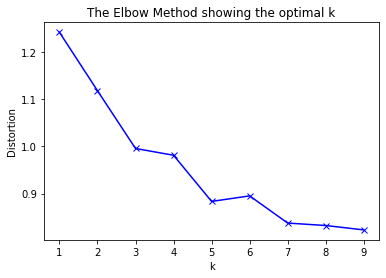

In [37]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_zip)
    distortions.append(sum(np.min(cdist(X_zip, model.cluster_centers_, 'euclidean'), axis=1)) / X_zip.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
zip_clusterer = KMeans(n_clusters=3).fit(X_zip)

#### MSA

In [39]:
X_msa = X_scaled.filter(regex='MSA$', axis=1)
X_msa.head()

,year_5_EQI_MSA,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_MSA,year_1_EQI_MSA
0,1.419335,1.491923,1.807625,1.156580,1.185991
1,1.316383,3.074423,1.191386,0.994389,0.798592
2,0.680615,1.196150,0.349907,0.850100,1.119195
3,0.498189,0.343634,0.436597,0.348184,0.147200
4,1.419335,1.491923,1.807625,1.156580,1.185991


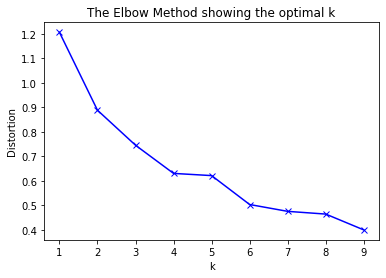

In [40]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_msa)
    distortions.append(sum(np.min(cdist(X_msa, model.cluster_centers_, 'euclidean'), axis=1)) / X_msa.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
msa_clusterer = KMeans(n_clusters=4).fit(X_msa)

#### State

In [42]:
X_state = X_scaled.filter(regex='state$', axis=1)
X_state.head()

,year_5_EQI_state,year_1_EQI_state,year_2_EQI_state,year_3_EQI_state,year_4_EQI_state,year_5_RECPI_state
0,3.404295,3.101660,3.010210,2.828211,2.606813,0.102615
1,4.766360,3.671295,4.069707,4.729936,5.737127,0.417774
2,2.603874,3.802470,3.419742,2.536466,2.169356,0.263585
3,2.547686,2.492929,3.149568,2.464278,2.270770,0.227930
4,3.404295,3.101660,3.010210,2.828211,2.606813,0.102615


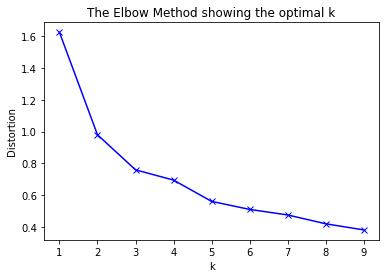

In [43]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_state)
    distortions.append(sum(np.min(cdist(X_state, model.cluster_centers_, 'euclidean'), axis=1)) / X_state.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
state_clusterer = KMeans(n_clusters=2).fit(X_state)

#### EQI

In [45]:
X_eqi = df.filter(regex='.*EQI.*', axis=1)
X_eqi.head()

,year_5_EQI_MSA,year_5_EQI_zip,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_zip,year_2_EQI_MSA,year_5_EQI_state,year_3_EQI_zip,year_1_EQI_state,year_2_EQI_state,year_3_EQI_state,year_4_EQI_state,year_1_EQI_MSA,year_1_EQI_zip
0,0.001361,0.001971,0.001394,0.001667,0.000827,0.001266,0.002326,0.004772,0.002111,0.002057,0.001996,0.002023,0.001549,0.002216
1,0.001299,0.001835,0.002317,0.001278,0.001156,0.001164,0.003029,0.001614,0.002386,0.002573,0.002948,0.003745,0.001233,0.000840
2,0.000917,0.003813,0.001222,0.000747,0.001882,0.001073,0.001913,0.001128,0.002450,0.002257,0.001850,0.001782,0.001494,0.001504
3,0.000808,0.000480,0.000725,0.000801,0.000640,0.000758,0.001884,0.000631,0.001817,0.002125,0.001814,0.001838,0.000702,0.000611
4,0.001361,0.001732,0.001394,0.001667,0.002858,0.001266,0.002326,0.003037,0.002111,0.002057,0.001996,0.002023,0.001549,0.000959


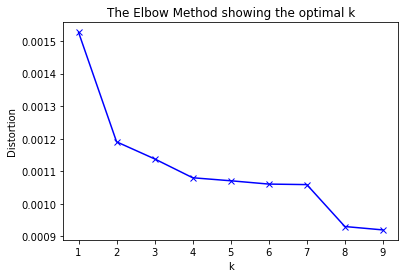

In [46]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_eqi)
    distortions.append(sum(np.min(cdist(X_eqi, model.cluster_centers_, 'euclidean'), axis=1)) / X_eqi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [47]:
eqi_clusterer = KMeans(n_clusters=2).fit(X_eqi)

#### RECPI

In [48]:
X_recpi = df.filter(regex='.*RECPI.*', axis=1)
X_recpi.head()

,year_5_RECPI_zip,year_4_RECPI_zip,year_3_RECPI_zip,year_2_RECPI_zip,year_1_RECPI_zip,year_5_RECPI_state
0,0.057166,0.024496,0.157489,0.022334,0.048744,38.430626
1,0.053203,0.038602,0.051642,0.027745,0.035283,55.327602
2,0.183047,0.040394,0.051883,0.079037,0.054131,47.060886
3,0.024020,0.035693,0.024611,0.037120,0.036063,45.149307
4,0.072728,0.185111,0.112374,0.111467,0.020148,38.430626


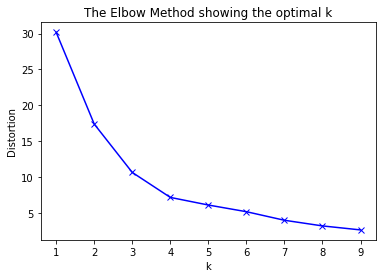

In [49]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_recpi)
    distortions.append(sum(np.min(cdist(X_recpi, model.cluster_centers_, 'euclidean'), axis=1)) / X_recpi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
recpi_clusterer = KMeans(n_clusters=4).fit(X_recpi)

## Predicting Training Dataset

In [51]:
X_scaled.head()

,year_5_EQI_MSA,year_5_EQI_zip,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_zip,year_5_RECPI_zip,year_2_EQI_MSA,year_5_EQI_state,year_3_EQI_zip,year_4_RECPI_zip,year_1_EQI_state,year_2_EQI_state,year_3_EQI_state,year_3_RECPI_zip,year_2_RECPI_zip,year_4_EQI_state,year_1_RECPI_zip,year_1_EQI_MSA,year_1_EQI_zip,year_5_RECPI_state
0,1.419335,1.156403,1.491923,1.807625,0.308747,0.215995,1.156580,3.404295,3.774334,-0.073654,3.101660,3.010210,2.828211,1.282764,-0.072511,2.606813,0.214847,1.185991,1.251538,0.102615
1,1.316383,1.050844,3.074423,1.191386,0.618625,0.180188,0.994389,4.766360,0.991997,0.045162,3.671295,4.069707,4.729936,0.216339,-0.011875,5.737127,0.069167,0.798592,0.235770,0.417774
2,0.680615,2.579561,1.196150,0.349907,1.302539,1.353463,0.850100,2.603874,0.563950,0.060263,3.802470,3.419742,2.536466,0.218766,0.562916,2.169356,0.273145,1.119195,0.725773,0.263585
3,0.498189,0.004722,0.343634,0.436597,0.132368,-0.083512,0.348184,2.547686,0.126282,0.020658,2.492929,3.149568,2.464278,-0.056009,0.093187,2.270770,0.077606,0.147200,0.066790,0.227930
4,1.419335,0.971300,1.491923,1.807625,2.222501,0.356615,1.156580,3.404295,2.245770,1.279253,3.101660,3.010210,2.828211,0.828222,0.926335,2.606813,-0.094622,1.185991,0.323919,0.102615


In [52]:
df['dataset_cluster'] = dataset_clusterer.predict(X_scaled)
df['zip_cluster'] = zip_clusterer.predict(X_scaled.filter(regex='zip$', axis=1))
df['msa_cluster'] = msa_clusterer.predict(X_scaled.filter(regex='MSA$', axis=1))
df['state_cluster'] = state_clusterer.predict(X_scaled.filter(regex='state$', axis=1))
df['eqi_cluster'] = eqi_clusterer.predict(X_scaled.filter(regex='.*EQI.*', axis=1))
df['recpi_cluster'] = recpi_clusterer.predict(X_scaled.filter(regex='.*RECPI.*', axis=1))

In [53]:
df.head()

,year_5_EQI_MSA,year_5_EQI_zip,year_3_EQI_MSA,year_4_EQI_MSA,year_2_EQI_zip,year_5_RECPI_zip,year_2_EQI_MSA,year_5_EQI_state,year_3_EQI_zip,year_4_RECPI_zip,...,year_5_RECPI_state,avg_eqi_year_5-10,zipcode,start_year,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster
0,0.001361,0.001971,0.001394,0.001667,0.000827,0.057166,0.001266,0.002326,0.004772,0.024496,...,38.430626,0.001287,1001,1992,1,0,2,1,0,0
1,0.001299,0.001835,0.002317,0.001278,0.001156,0.053203,0.001164,0.003029,0.001614,0.038602,...,55.327602,0.001853,1001,1997,1,0,2,1,0,0
2,0.000917,0.003813,0.001222,0.000747,0.001882,0.183047,0.001073,0.001913,0.001128,0.040394,...,47.060886,0.000602,1001,2002,1,0,2,1,0,0
3,0.000808,0.000480,0.000725,0.000801,0.000640,0.024020,0.000758,0.001884,0.000631,0.035693,...,45.149307,0.000898,1001,2007,1,0,2,1,0,0
4,0.001361,0.001732,0.001394,0.001667,0.002858,0.072728,0.001266,0.002326,0.003037,0.185111,...,38.430626,0.002931,1002,1992,1,0,2,1,0,0


In [54]:
path = '../../data/processed/feature-eng-clustered.csv'
df.to_csv(path, index=False)